<a href="https://colab.research.google.com/github/SnehaBaranwal/Kaggle/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install squarify

In [23]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

plt.style.use('fivethirtyeight')

%matplotlib inline

#Supress any unwanted warnings that may come up
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_superstore = pd.read_csv('/Sample - Superstore.csv', encoding='ISO-8859-1')
df_superstore.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Average Sales across different Regions (Categorical vs Numerical axes)**

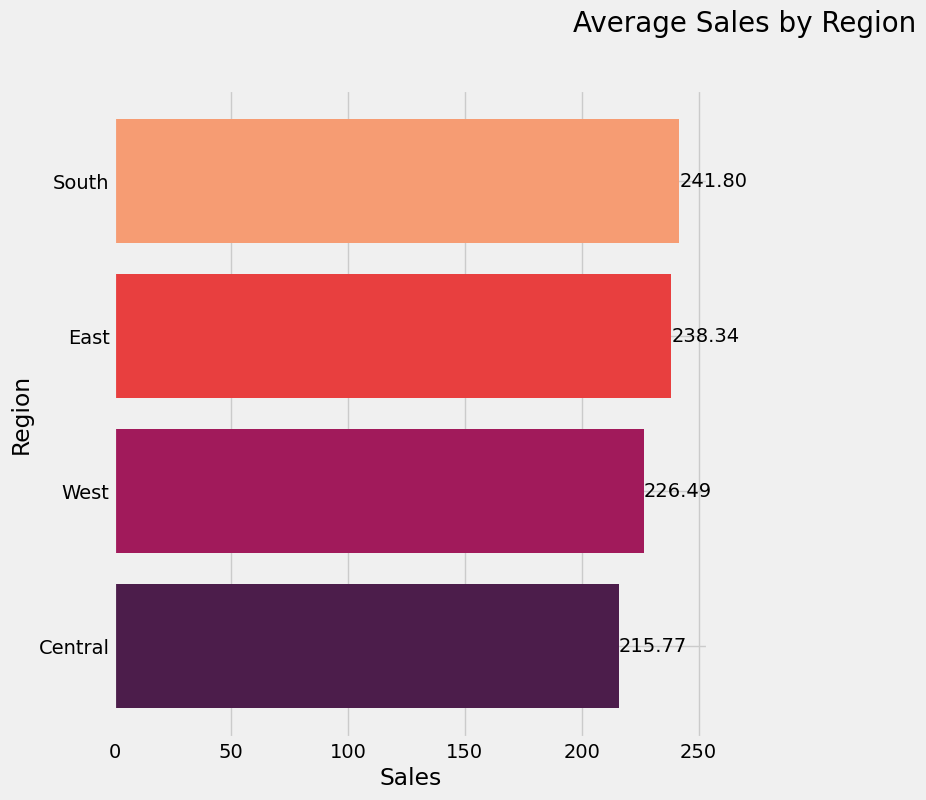

In [4]:
df_bar = df_superstore[['Region','Sales']]
df_bar = df_bar.groupby('Region').mean().sort_values(by='Sales', ascending=True)

#df_bar.head()

plt.figure(figsize=[15,8])

#Data Visualization of average sales by region

plt.suptitle('Average Sales by Region', fontsize=20)

n_bars = len(df_bar)
palette = sns.color_palette("rocket", n_bars)

#Plotting the Bar chart
plt.subplot(1,2,1)
bars = plt.barh(y=df_bar.index, width=df_bar.Sales, color=palette,height=0.8)

#Adding sales value on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',  # format the value
             ha='left', va='center')

plt.xlabel('Sales')
plt.ylabel('Region')

plt.show()




In [5]:
# 1. Select and sort
df_line = df_superstore[['Order Date', 'Sales', 'Profit']].sort_values('Order Date')

# 2. Convert to datetime
df_line['Order Date'] = pd.to_datetime(df_line['Order Date'])

# 3. Group by date and take average
df_line = df_line.groupby('Order Date').mean().reset_index()

# 4. Reshape data to long format
df_melted = df_line.melt(id_vars='Order Date', value_vars=['Sales', 'Profit'],
                         var_name='Metric', value_name='Value')

# 5. Plot both lines
fig = px.line(
    df_melted,
    x='Order Date',
    y='Value',
    color='Metric',
    title='Interactive Sales and Profit Over Time',
    markers=True
)

#6. find the date with the maximum Sales
max_sales_date = df_line.loc[df_line['Sales'].idxmax(), 'Order Date']
max_sales_value = df_line['Sales'].max()


#7. Add Annotation
fig.add_annotation(
    x=max_sales_date,
    y=max_sales_value,
    text="Peak Sales",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

fig.show()


## **Monthly Trend: Group by Month**

In [6]:
# Convert to datetime
df_superstore['Order Date'] = pd.to_datetime(df_superstore['Order Date'])

#Set Order Date as index temporarily for resampling
df_monthly = df_superstore.set_index('Order Date').resample('MS')[['Sales', 'Profit']].mean().reset_index()

# Melt to long format
df_melted_month = df_monthly.melt(id_vars='Order Date', value_vars=['Sales', 'Profit'],
                                  var_name='Metric', value_name='Value')
#Plot
fig = px.line(
    df_melted_month,
    x='Order Date',
    y='Value',
    color='Metric',
    title='Monthly Average Sales and Profit Over Time',
    markers=True
)

fig.show()

In [7]:
# Resample quarterly (Q = calendar quarters: Jan–Mar, Apr–Jun, etc.)
df_quarterly = df_superstore.set_index('Order Date').resample('Q')[['Sales', 'Profit']].mean().reset_index()

# Melt to long format
df_melted_quarter = df_quarterly.melt(id_vars='Order Date', value_vars=['Sales', 'Profit'],
                                      var_name='Metric', value_name='Value')

# Plot
fig = px.line(
    df_melted_quarter,
    x='Order Date',
    y='Value',
    color='Metric',
    title='Quarterly Average Sales and Profit Over Time',
    markers=True
)
fig.show()



## Distribution of Profits and Sales

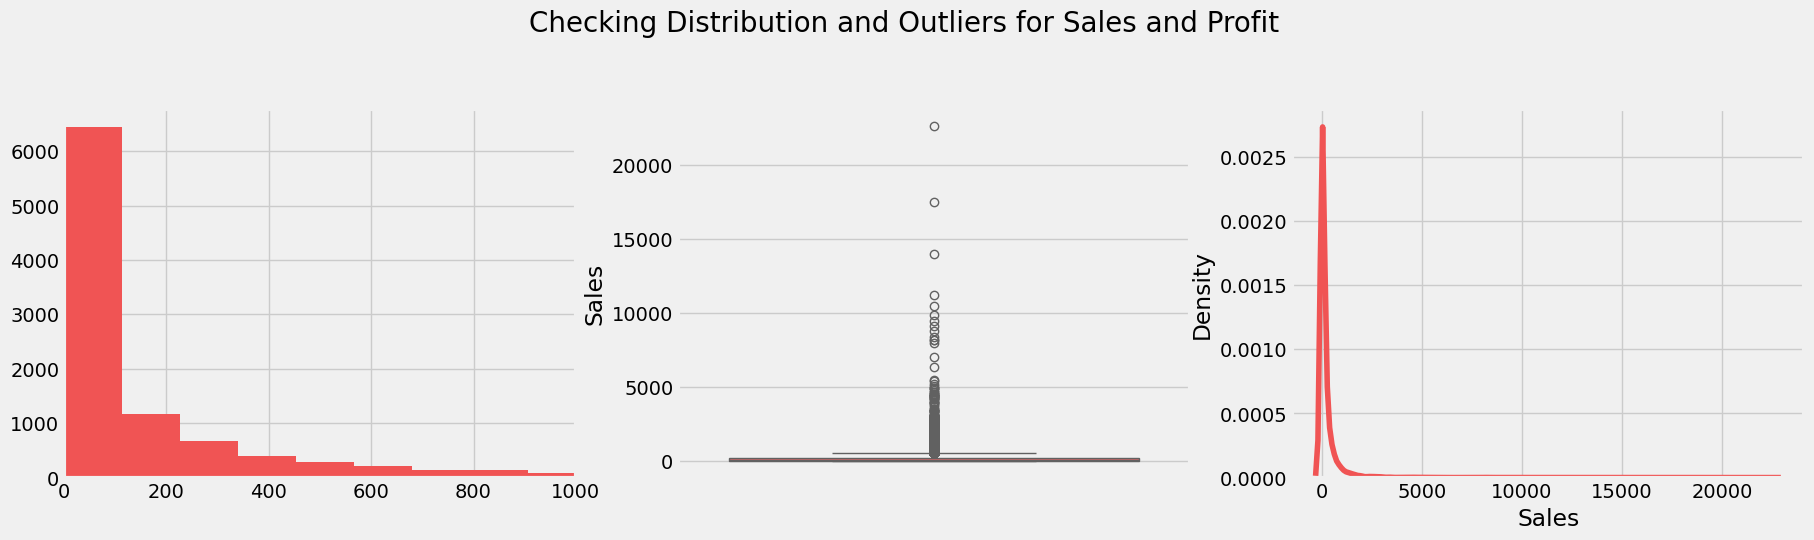

In [8]:
df_dist = df_superstore[['Sales','Profit']]

plt.figure(figsize=[20,10])

plt.suptitle("Checking Distribution and Outliers for Sales and Profit", size=20)

# Histogram for Sales
plt.subplot(2,3,1)
plt.hist(df_dist['Sales'], bins=200, color='#F05454')
plt.xlim(0,1000)

# Boxplot of  for Sales
plt.subplot(2,3,2)
sns.boxplot(df_dist['Sales'], color='#F05454')

# KDEPlot for Sales
plt.subplot(2,3,3)
sns.kdeplot(x=df_dist['Sales'], color='#F05454')

plt.show()

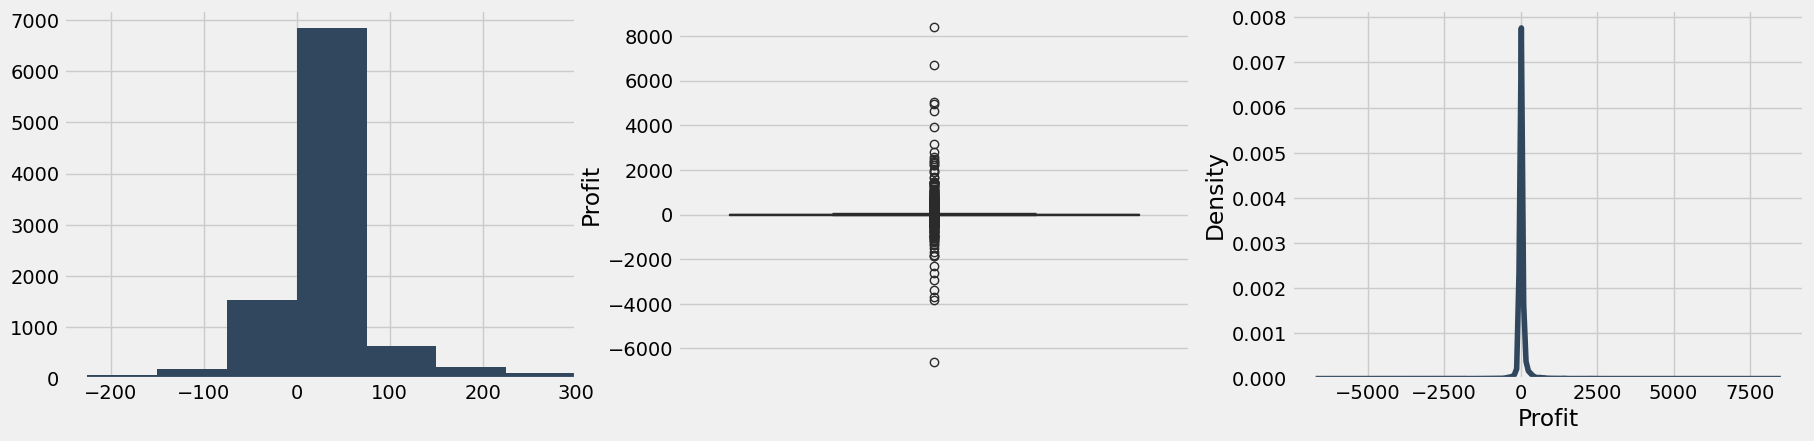

In [9]:
plt.figure(figsize=[20,10])
# Histogram for Profit
plt.subplot(2,3,1)
plt.hist(df_dist['Profit'], bins=200, color='#30475E')
plt.xlim(-250,300)

# Boxplot of  for Profit
plt.subplot(2,3,2)
sns.boxplot(df_dist['Profit'], color='#30475E')

# KDEPlot for Sales
plt.subplot(2,3,3)
sns.kdeplot(x=df_dist['Profit'], color='#30475E')

plt.show()


## Understanding how the Sales impact Profit for different Customer Segments

In [10]:
df_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


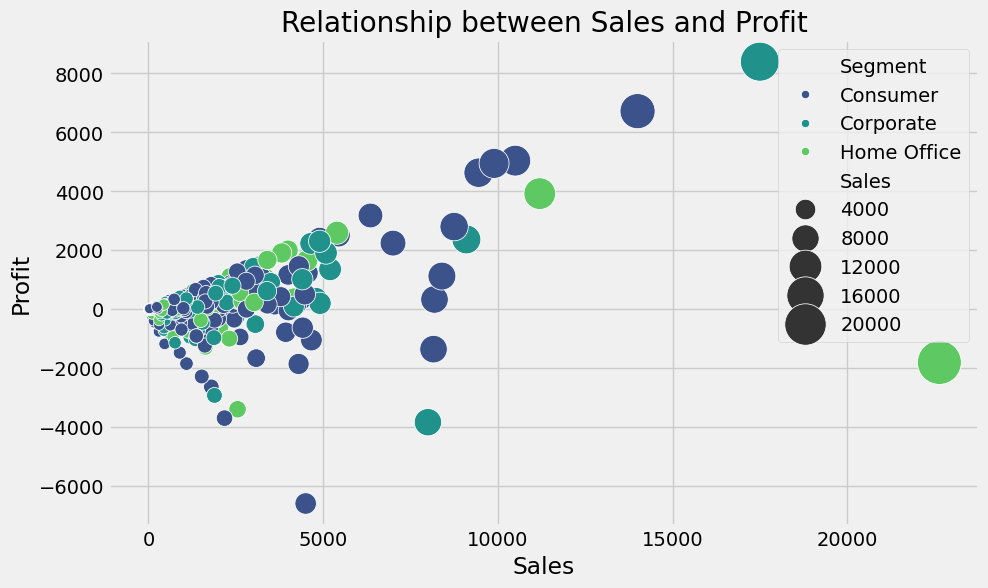

In [21]:
# Getting the necessary columns ina separate smaller df
df_SalesProfit = df_superstore[['Segment','Sales','Profit']]
#df_SalesProfit.head()

#Visualizing through scatterplot
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_SalesProfit, x='Sales', y='Profit', hue='Segment', palette='viridis', size='Sales',sizes=(50,1000),legend='auto')

# Add labels and title
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relationship between Sales and Profit")

# Show the plot
plt.show()

### Understanding the Sales and Profits according to Category and Sub-Category

In [38]:
df_set = df_superstore[['Category','Sub-Category','Sales','Profit']]
df_set.head()

#Creating Drill down visualization (Category -> Sub-Category)
# Top-level: Sales by Category
category_sales = df_set.groupby('Category')['Sales'].sum().reset_index()

# Drill-down: Sales by Sub-Category within each Category
subcat_sales = df_set.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Base trace: Top-level
top_trace = go.Bar(x=category_sales['Category'], y=category_sales['Sales'], name='Category Sales')

#Creating drill down traces one per category
drilldown_traces = []
buttons = []

categories = category_sales['Category'].tolist()

for i, cat in enumerate(categories):
    filtered = subcat_sales[subcat_sales['Category'] == cat]
    trace = go.Bar(x=filtered['Sub-Category'], y=filtered['Sales'], name=f"{cat} Sub-Categories", visible=False)
    drilldown_traces.append(trace)

    buttons.append(dict(
        label=f"Drill into {cat}",
        method="update",
        args=[
            {"visible": [False]*(1 + len(categories))},  # all hidden
            {"title": f"{cat} - Sub-Category Sales"}
        ]
    ))

  # Make this trace visible when selected
    buttons[-1]['args'][0]['visible'][i + 1] = True

# Add "Top Level" button
buttons.insert(0, dict(
    label="Top Level",
    method="update",
    args=[
        {"visible": [True] + [False]*len(categories)},
        {"title": "Sales by Category"}
    ]
))


# Final figure
fig = go.Figure(data=[top_trace] + drilldown_traces)

fig.update_layout(
    width = 1000,
    height = 800,
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "showactive": True,
        "x": 1.0,
        "xanchor": "right",
        "y": 1.2,
        "yanchor": "top"
    }],
    title="Sales by Category"
)

fig.show()


## Understanding how Shipping Mode has an impact on the sum of profit and sales

Text(0.5, 0.98, 'Sales and Profit by Ship Mode')

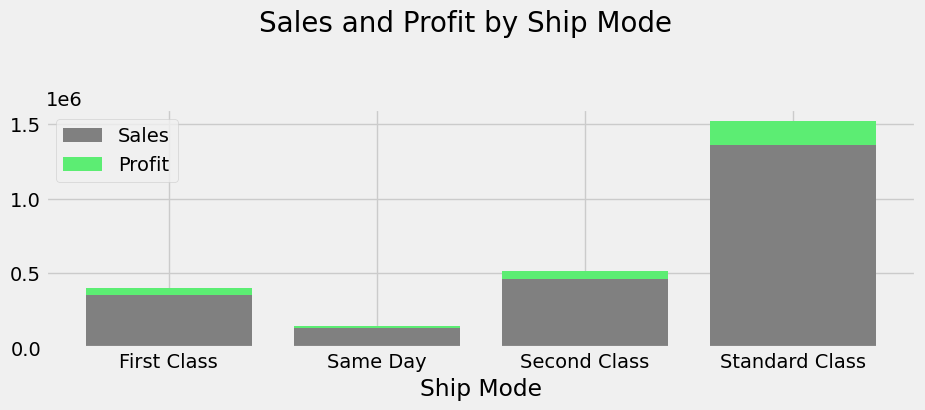

In [46]:
#Taking the subset
df_stackbar = df_superstore[['Ship Mode','Sales','Profit']]

#Group by on ship mode
df_stackbar = df_stackbar.groupby('Ship Mode').sum().reset_index()

#Visualizing using stacked bar chart of Sales and Profit
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
plt.bar(x=df_stackbar['Ship Mode'], height=df_stackbar['Sales'], color='#808080')
plt.bar(x=df_stackbar['Ship Mode'], height=df_stackbar['Profit'], bottom=df_stackbar['Sales'], color='#5ced73')
plt.legend(['Sales', 'Profit'])
plt.xlabel('Ship Mode')
plt.suptitle('Sales and Profit by Ship Mode', fontsize=20)

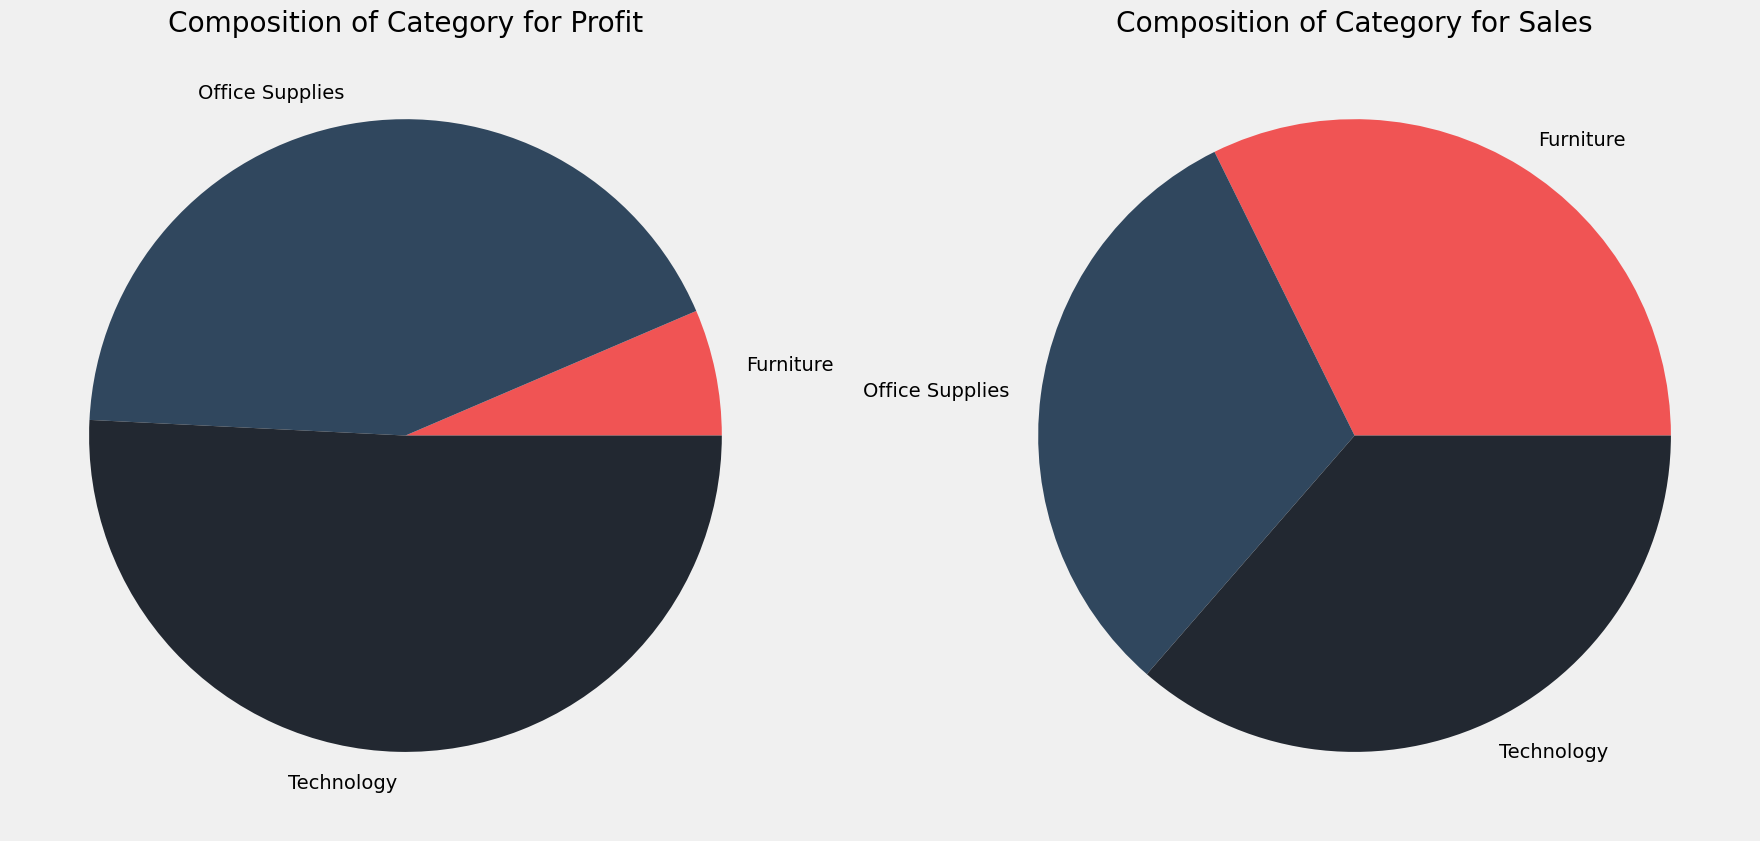

In [58]:
# Taking a subset of data (To keep things simple)
df_pie = df_superstore[['Category','Sales','Profit']]
# taking a groupby on ship mode
df_pie = df_pie.groupby(['Category']).sum().reset_index()

plt.figure(figsize=[20,10])
# Visualizing the Pie Chart (Profit)
plt.subplot(1,2,1)
plt.pie(df_pie['Profit'], labels=df_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Profit")

# Visualizing the Pie Chart (Sales)
plt.subplot(1,2,2)
plt.pie(df_pie['Sales'], labels=df_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Sales")

plt.show()

## Plotting a treemap across different Segments

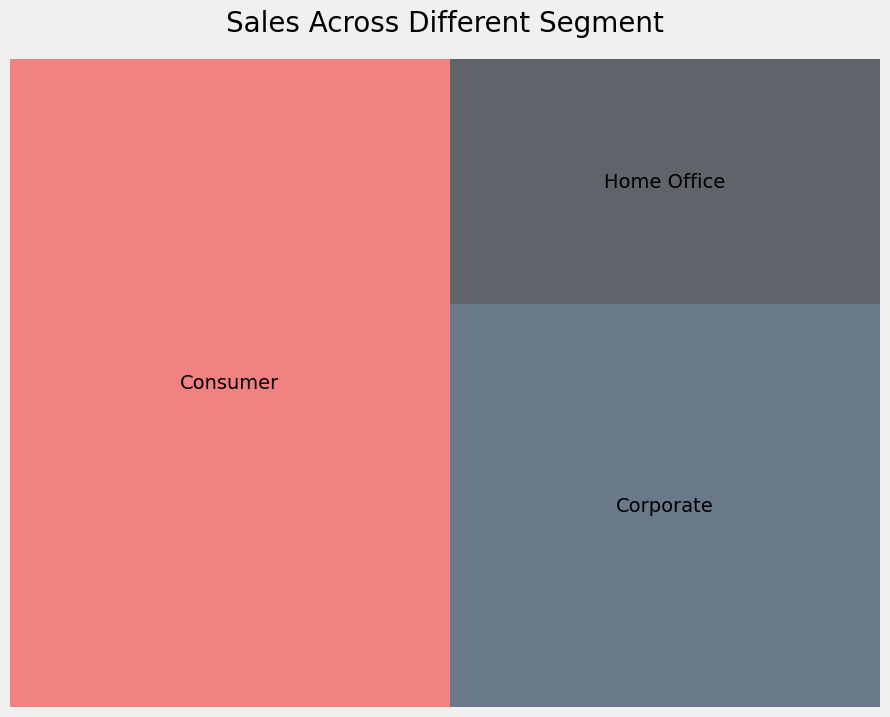

In [64]:
# Taking a subset of data (To keep things simple)
df_tree = df_superstore[['Segment','Sales']]
# taking a groupby on category and then ship mode...
df_tree = df_tree.groupby(['Segment']).sum().reset_index()

# Visualizing the TreeMap (Sales)
plt.figure(figsize=[10,8])

squarify.plot(sizes=df_tree['Sales'], label=df_tree['Segment'],
              color=['#F05454','#30475E','#222831'], alpha=0.7)
plt.title("Sales Across Different Segment", size=20, pad=20)
plt.axis('off')

plt.show()